In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from definitions import figures_path_meth, data_source_path, target_countries, fig_size, \
show_plots, save_figs, show_results, target_var, country_col, date_col, incl_countries, incl_years
from helper_functions import read_data, get_impl_date, get_trans, get_timescale, get_data_path
from plot_functions import plot_corr

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler

In [2]:
figures_path_meth_eda = f'{figures_path_meth}EDA/'
timeframe = 'm'

In [3]:
test_country = 'france'

# Descriptive data

In [4]:
co2_m = read_data(get_data_path(timeframe='m'), file_name='co2_m')
co2_q = read_data(get_data_path(timeframe='q'), file_name='co2_q')

co2_m.describe()

,year,month,co2
count,4560.000000,4560.000000,4.560000e+03
mean,2009.500000,6.500000,1.649718e+10
std,5.766914,3.452431,1.939575e+10
min,2000.000000,1.000000,9.265613e+08
25%,2004.750000,3.750000,4.359616e+09
50%,2009.500000,6.500000,7.941463e+09
75%,2014.250000,9.250000,2.543950e+10
max,2019.000000,12.000000,1.097771e+11


In [5]:
gdp_q = read_data(get_data_path(timeframe='q'), file_name='gdp_q')
gdp_m = read_data(get_data_path(timeframe='m'), file_name='gdp_m')

gdp_q.describe()

,year,quarter,gdp
count,1520.000000,1520.000000,1.520000e+03
mean,2009.500000,2.500000,8.149040e+11
std,5.768179,1.118402,9.872702e+11
min,2000.000000,1.000000,2.863720e+10
25%,2004.750000,1.750000,1.744602e+11
50%,2009.500000,2.500000,3.323868e+11
75%,2014.250000,3.250000,1.150819e+12
max,2019.000000,4.000000,4.848486e+12


In [6]:
pop_q = read_data(get_data_path(timeframe='q'), file_name='pop_q')
pop_m = read_data(get_data_path(timeframe='m'), file_name='pop_m')

pop_q.describe()

,year,quarter,pop
count,1520.000000,1520.000000,1.520000e+03
mean,2009.500000,2.500000,2.334591e+10
std,5.768179,1.118402,2.452787e+10
min,2000.000000,1.000000,2.794100e+09
25%,2004.750000,1.750000,7.506125e+09
50%,2009.500000,2.500000,1.050610e+10
75%,2014.250000,3.250000,4.322110e+10
max,2019.000000,4.000000,8.314600e+10


# Interpolation

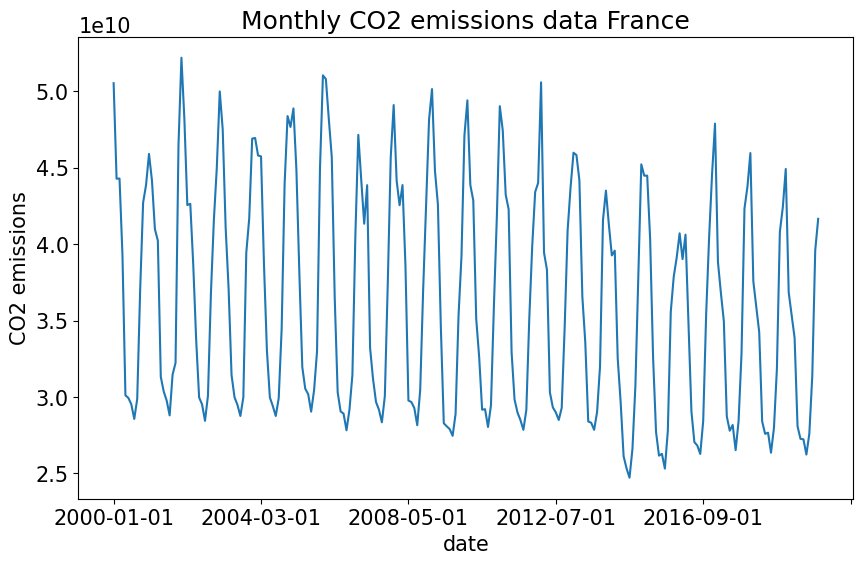

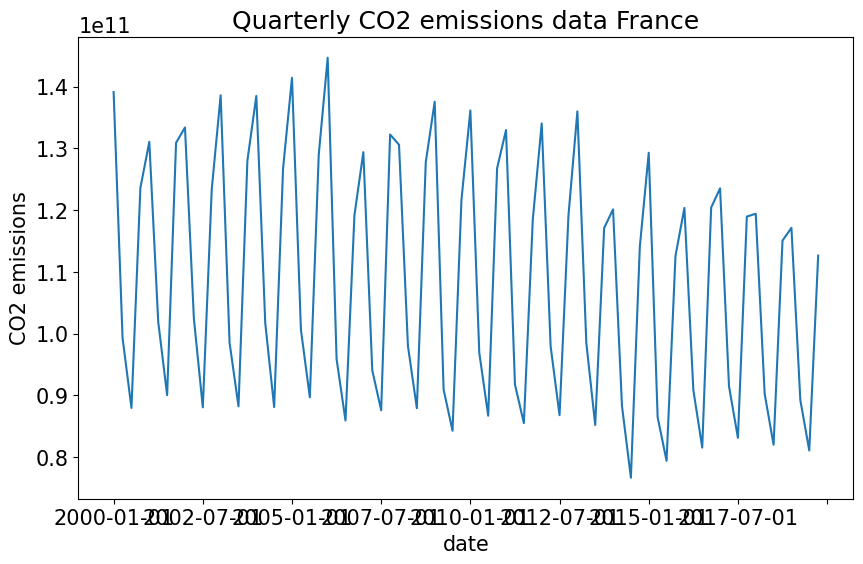

In [7]:
co2_m_plot = co2_m[co2_m['country']==test_country].set_index('date')['co2'].plot(figsize=fig_size)
plt.title('Monthly CO2 emissions data France')
plt.xlabel('date')
plt.ylabel('CO2 emissions')
plt.savefig(f'{figures_path_meth_eda}france_co2_m.png', bbox_inches='tight', pad_inches=0)
plt.show()

co2_q_plot = co2_q[co2_q['country']==test_country].set_index('date')['co2'].plot(figsize=fig_size)
plt.title('Quarterly CO2 emissions data France')
plt.xlabel('date')
plt.ylabel('CO2 emissions')
plt.savefig(f'{figures_path_meth_eda}france_co2_q.png', bbox_inches='tight', pad_inches=0)
plt.show()

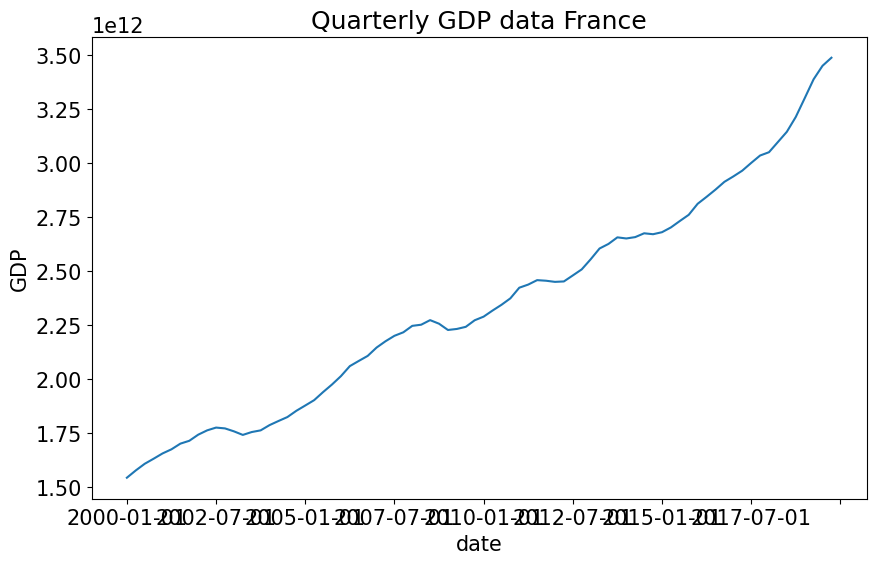

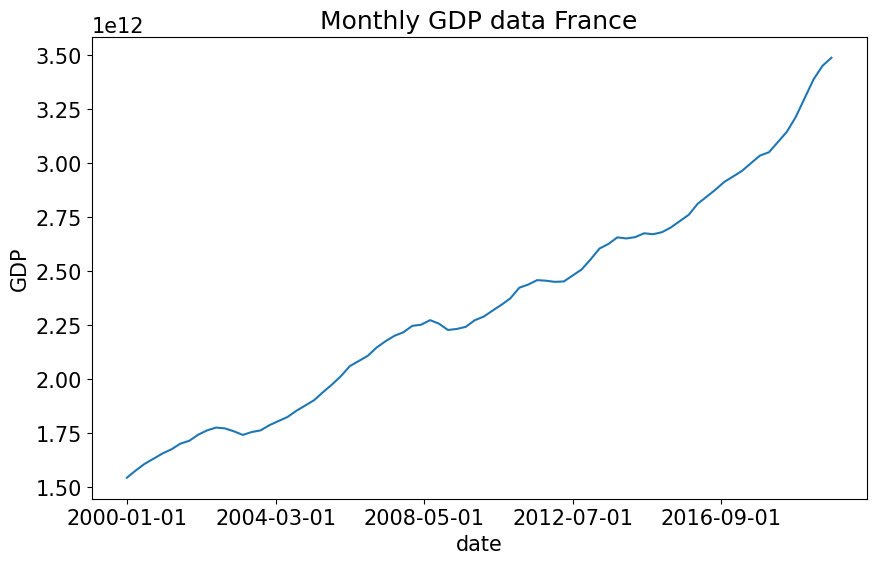

In [8]:
gdp_q[gdp_q['country']==test_country].set_index('date')['gdp'].plot(figsize=fig_size)
plt.title('Quarterly GDP data France')
plt.xlabel('date')
plt.ylabel('GDP')
plt.savefig(f'{figures_path_meth_eda}france_gdp_q.png', bbox_inches='tight', pad_inches=0)
plt.show()

gdp_m[gdp_m['country']==test_country].set_index('date')['gdp'].plot(figsize=fig_size)
plt.title('Monthly GDP data France')
plt.xlabel('date')
plt.ylabel('GDP')
plt.savefig(f'{figures_path_meth_eda}france_gdp_m.png', bbox_inches='tight', pad_inches=0)
plt.show()

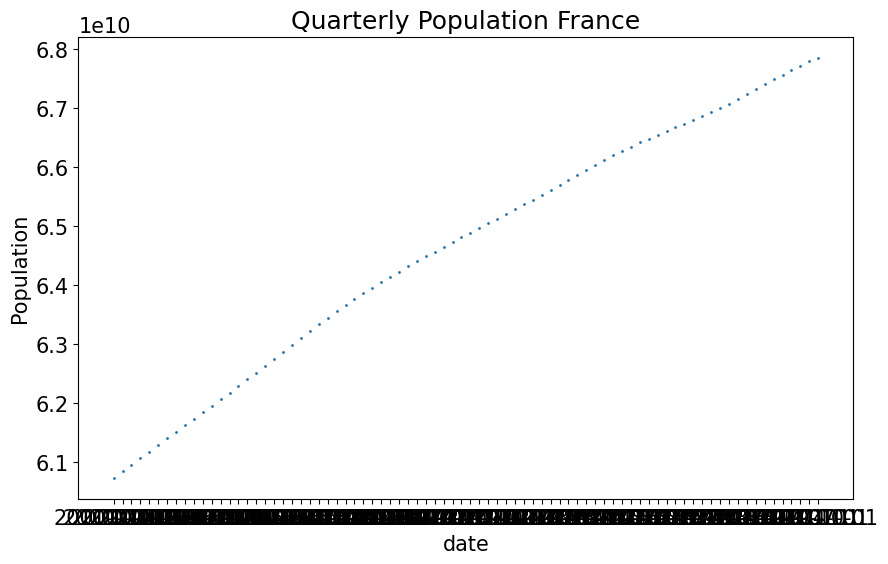

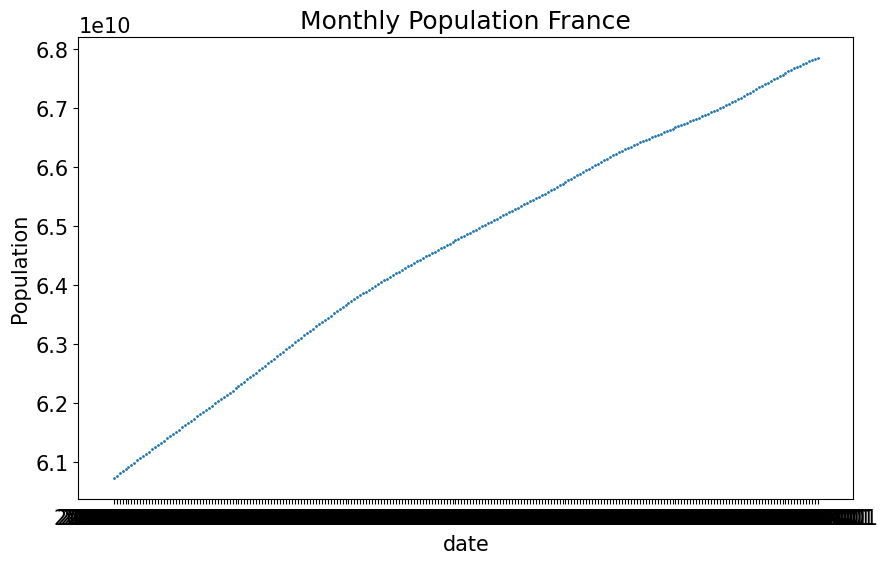

In [9]:
plt.figure(0, figsize=fig_size)
# pop_q[pop_q['country']==test_country].set_index('date')['pop'].plot(figsize=fig_size)
pop_q_plot = pop_q[pop_q['country']==test_country].set_index('date')['pop']
plt.scatter(pop_q_plot.index, pop_q_plot, s=1)
plt.title('Quarterly Population France')
plt.xlabel('date')
plt.ylabel('Population')
# plt.savefig(f'{figures_path_meth_eda}france_pop_q.png', bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure(1, figsize=fig_size)
# pop_m[pop_m['country']==test_country].set_index('date')['pop'].plot(figsize=fig_size)
pop_m_plot = pop_m[pop_m['country']==test_country].set_index('date')['pop']
plt.scatter(pop_m_plot.index, pop_m_plot, s=1)
plt.title('Monthly Population France')
plt.xlabel('date')
plt.ylabel('Population')
# plt.savefig(f'{figures_path_meth_eda}france_pop_m.png', bbox_inches='tight', pad_inches=0)
plt.show()

# Series

In [10]:
df_raw = read_data(get_data_path(timeframe), f'total_{timeframe}')
df = df_raw.copy()
df

,country,date,year,month,co2,gdp,pop,co2_cap,gdp_cap
0,austria,2000-01-01,2000,1,9.726928e+09,2.309478e+11,8.003000e+09,1.215410,28.857653
1,austria,2000-02-01,2000,2,8.532685e+09,2.321217e+11,8.004700e+09,1.065959,28.998180
2,austria,2000-03-01,2000,3,8.134567e+09,2.332957e+11,8.006400e+09,1.016008,29.138647
3,austria,2000-04-01,2000,4,6.546738e+09,2.344696e+11,8.008100e+09,0.817514,29.279055
4,austria,2000-05-01,2000,5,5.603262e+09,2.352176e+11,8.010100e+09,0.699525,29.365122
...,...,...,...,...,...,...,...,...,...
4517,united kingdom,2019-06-01,2019,6,2.864851e+10,3.302814e+12,6.684433e+10,0.428585,49.410534
4518,united kingdom,2019-07-01,2019,7,2.872032e+10,3.322513e+12,6.686800e+10,0.429508,49.687638
4519,united kingdom,2019-08-01,2019,8,2.809851e+10,3.338771e+12,6.689167e+10,0.420060,49.913109
4520,united kingdom,2019-09-01,2019,9,3.070698e+10,3.355029e+12,6.691533e+10,0.458893,50.138420


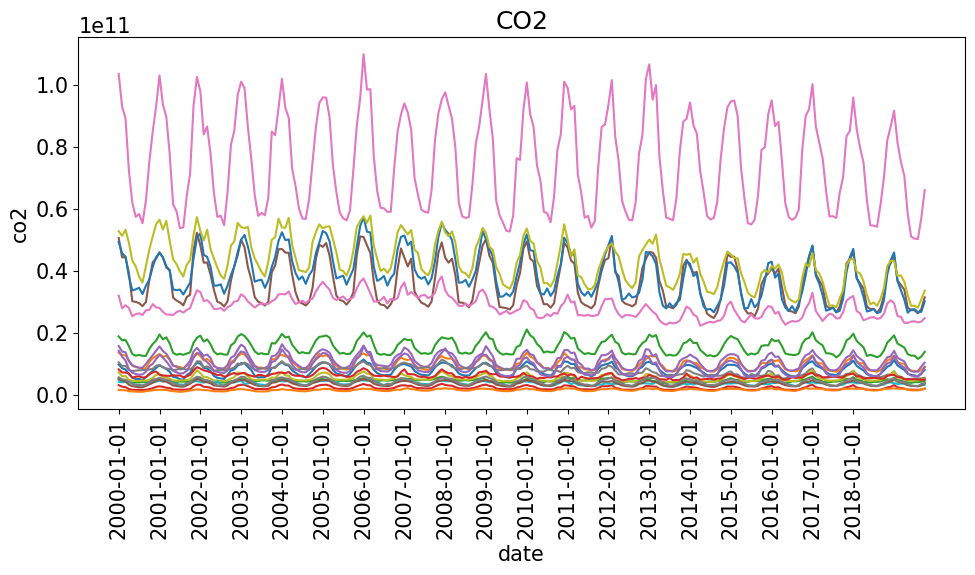

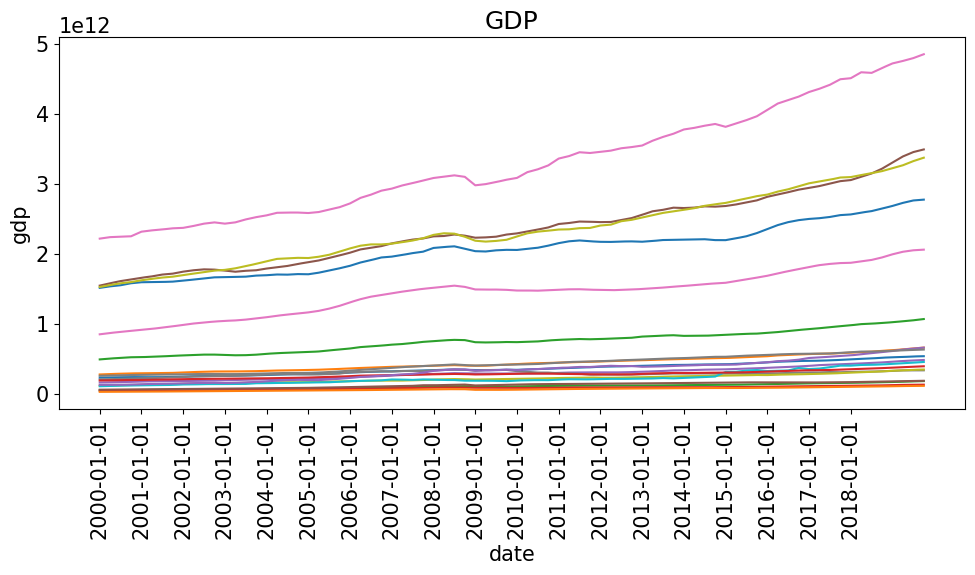

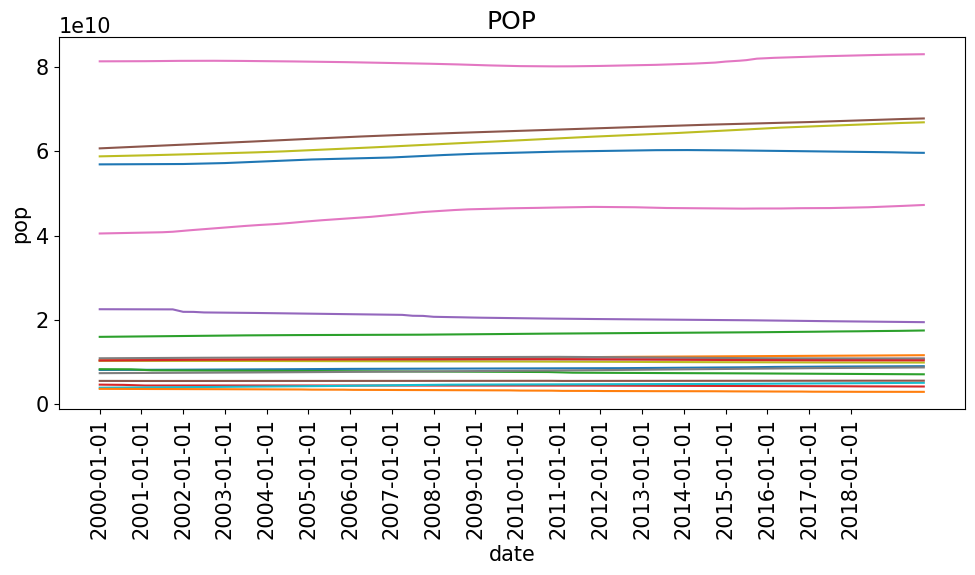

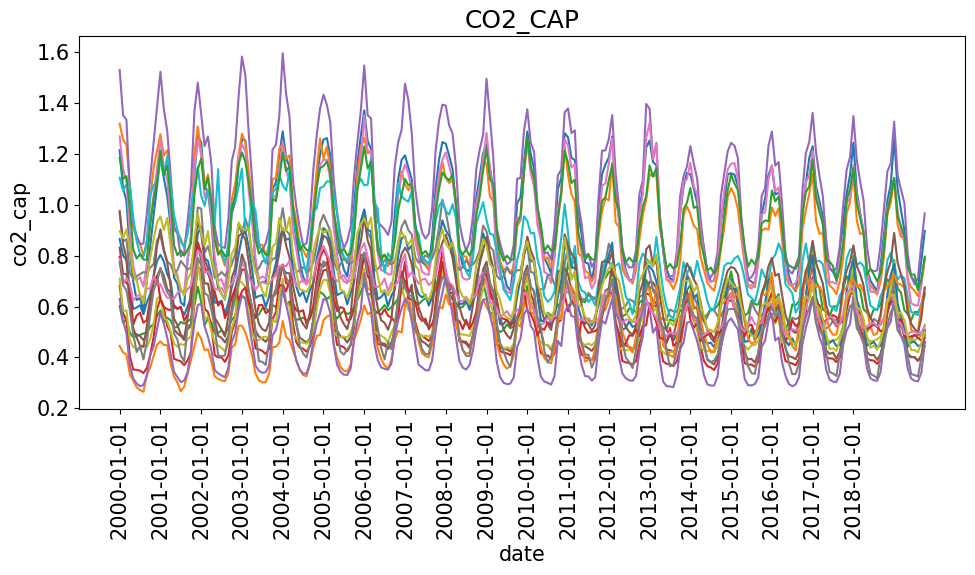

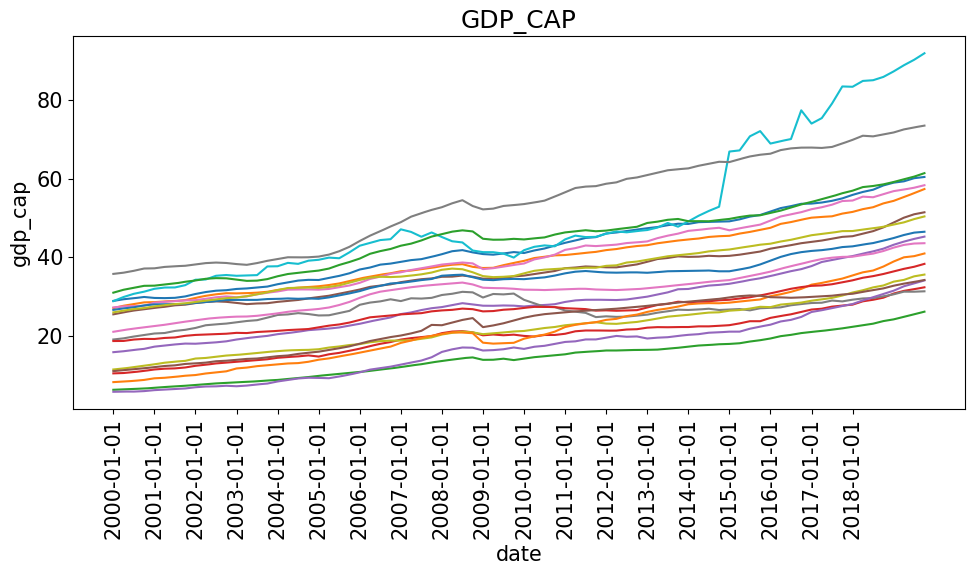

In [11]:
def all_series(df: object, timeframe: str):
    timescale = get_timescale(timeframe=timeframe)
    trans = get_trans(timeframe=timeframe)

    for series in trans.keys():

        df_pivot = df.pivot(index=date_col, columns=country_col, values=series)
        df_scale = df_pivot

        plt.figure(figsize=fig_size)
        plt.plot(df_pivot.index, df_scale, label=df_pivot.columns)
        plt.title(series.upper())
        plt.xticks([df_pivot.index[timescale * i] for i in range(int(len(df_pivot)/timescale))], rotation='vertical')
        plt.xlabel('date')
        plt.ylabel(f"{series}")
#         if series == 'pop':
#             plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
        plt.tight_layout()
        if save_figs:
            plt.savefig(f"{figures_path_meth_eda}{series}.png")
        if show_plots:
            plt.show()
            
all_series(df, timeframe='m')

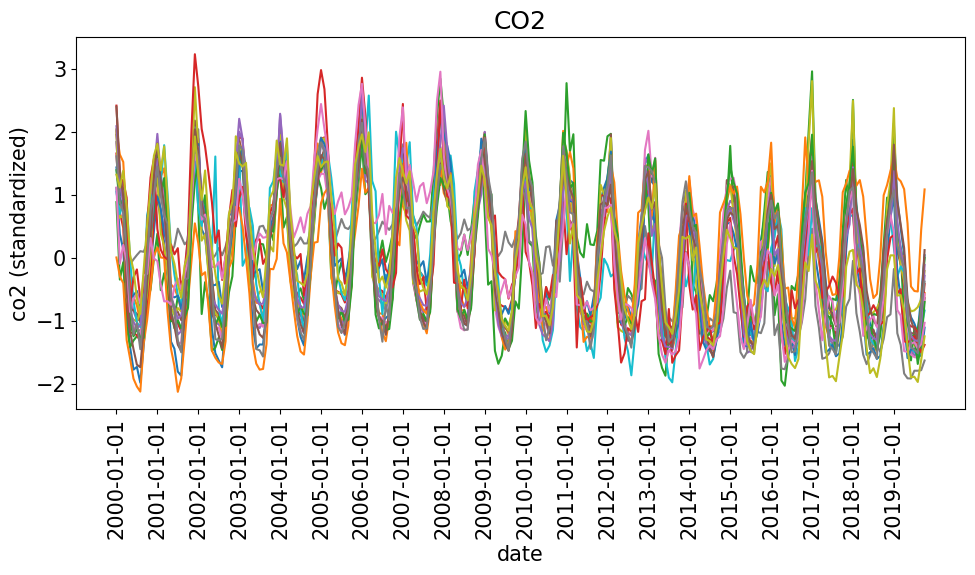

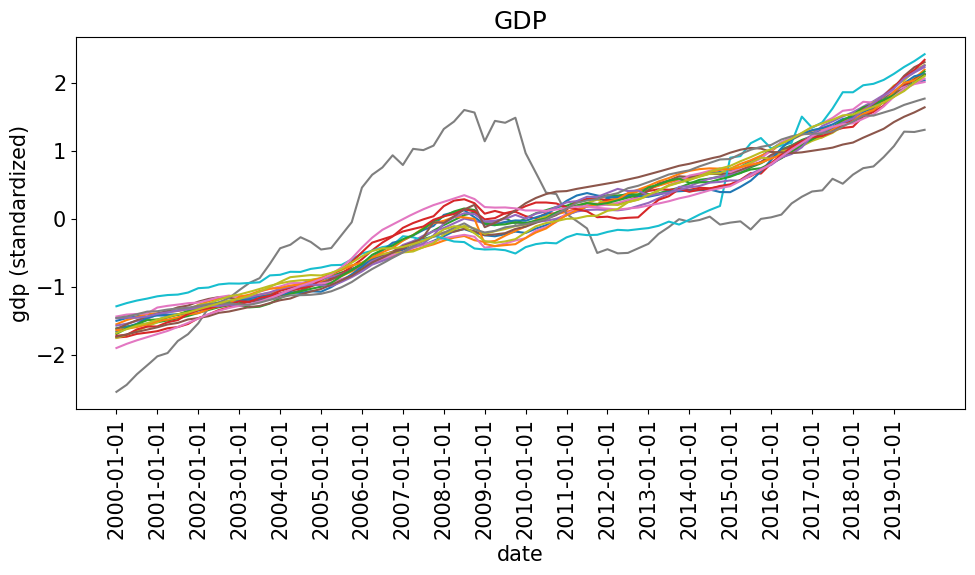

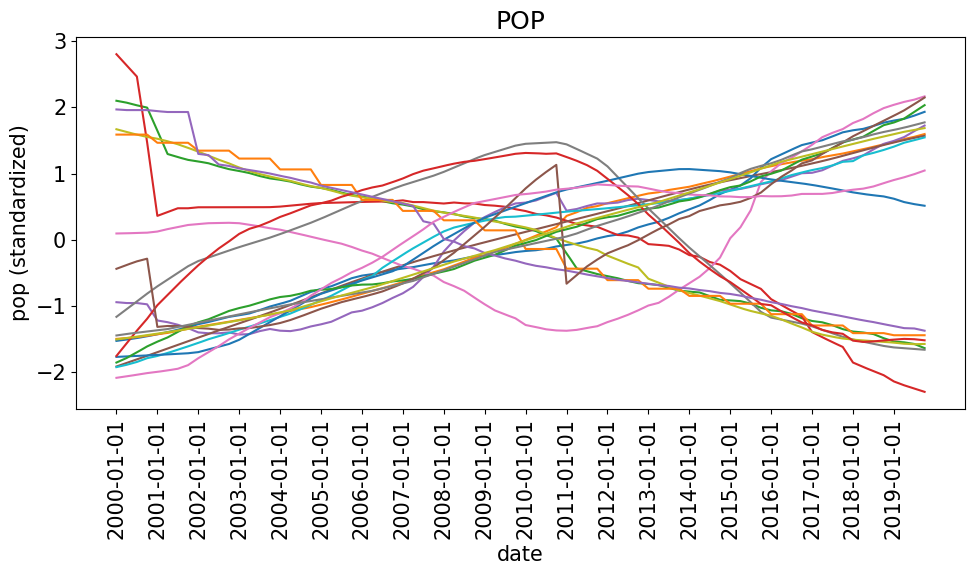

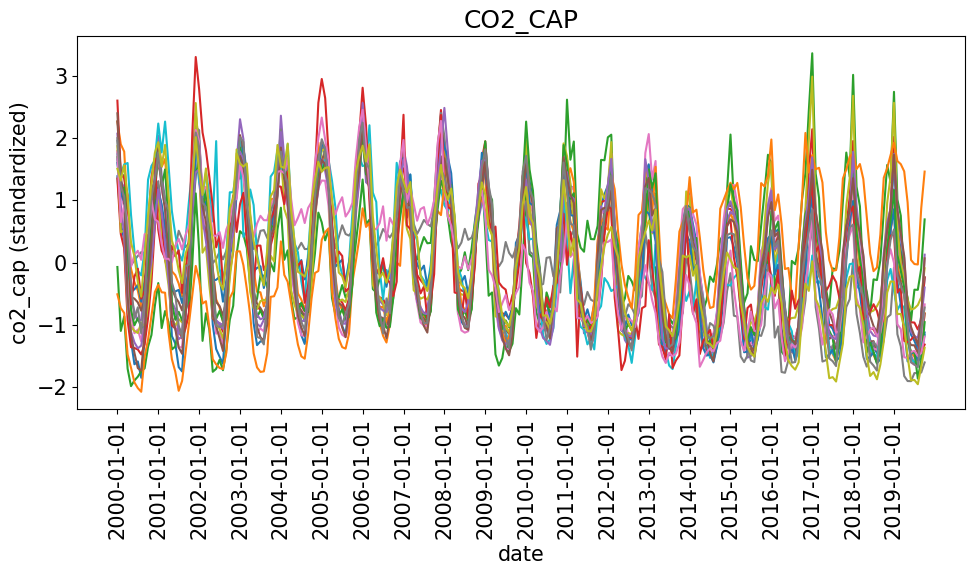

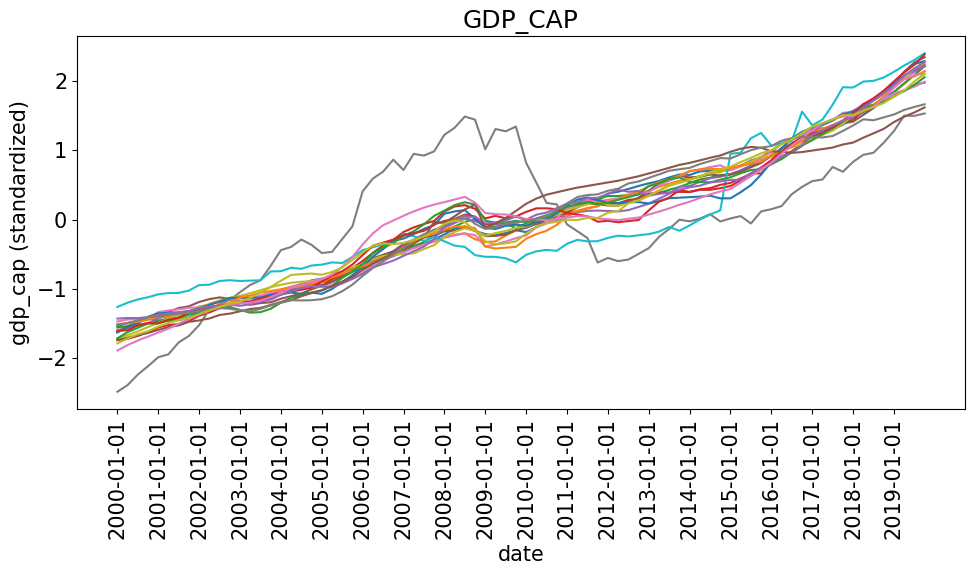

In [12]:
def all_series_stand(df: object, timeframe: str):
    timescale = get_timescale(timeframe=timeframe)
    trans = get_trans(timeframe=timeframe)

    scaler = StandardScaler()
    for series in trans.keys():

        df_pivot = df.pivot(index=date_col, columns=country_col, values=series)
        df_scale = scaler.fit_transform(df_pivot)

        plt.figure(figsize=fig_size)
        plt.plot(df_pivot.index, df_scale, label=df_pivot.columns)

        plt.title(series.upper())
        plt.xticks([df_pivot.index[timescale * i] for i in range(int(len(df_pivot) / timescale + 1))], rotation='vertical')
        plt.xlabel('date')
        plt.ylabel(f"{series} (standardized)")
#         if series == 'pop':
#             plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
        plt.tight_layout()
        if save_figs:
            plt.savefig(f"{figures_path_meth_eda}{series}_stand.png")
        if show_plots:
            plt.show()
            
all_series_stand(df, timeframe='m')

# Correlation plot

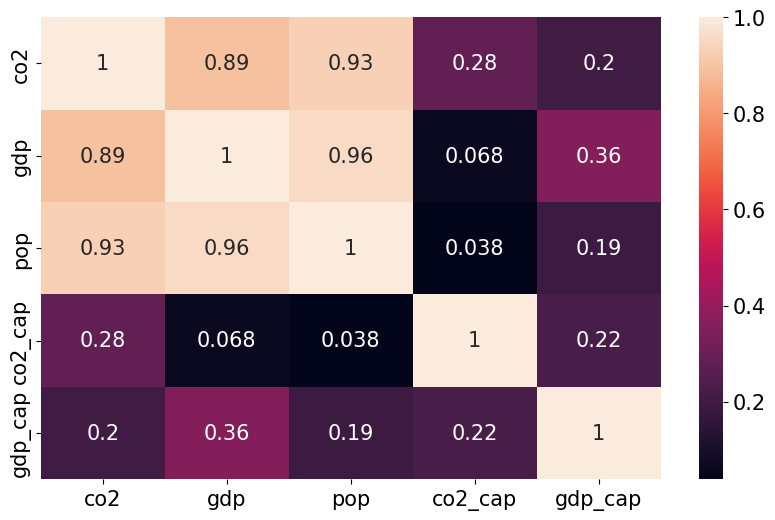

In [13]:
def corr_matrix(df: object):
    df_cor = df.copy()
#     df_cor = df_cor[df_cor[country_col] == target_country]
    df_cor = df_cor[get_trans()]
    cor_matrix = df_cor.corr()
    plt.figure(figsize=fig_size)
    plt.tight_layout()
    sns_plot = sns.heatmap(cor_matrix, annot=True)
    sns_plot.figure.savefig(f"{figures_path_meth_eda}corr_matrix.png")
    plt.show()
        
corr_matrix(df)

# CO2 focus

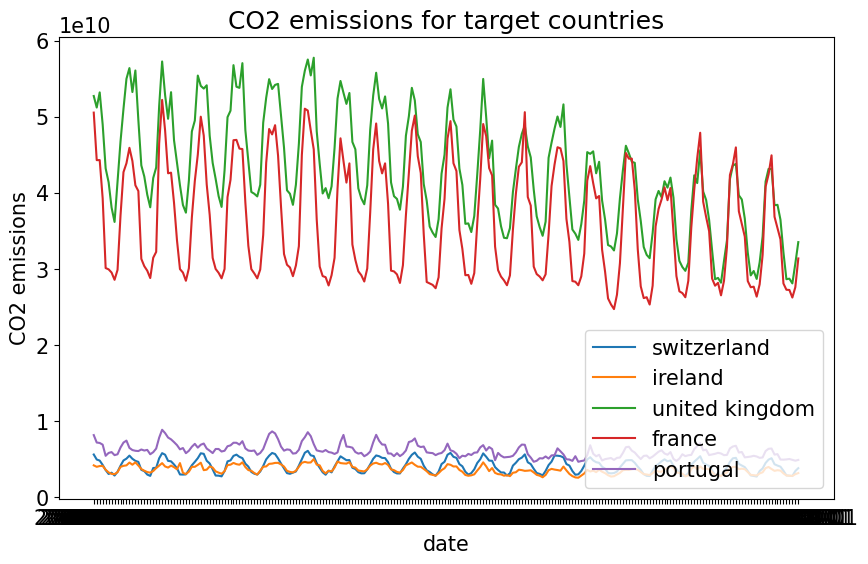

In [14]:
df_target = df[df['country'].isin(target_countries)]
df_target = df_target.set_index('date')[['country','co2']]
df_target

plt.figure(figsize=fig_size)
for country in target_countries:
    plt.plot(df_target[df_target['country']==country]['co2'], label=country)
plt.title('CO2 emissions for target countries')
plt.xlabel('date')
plt.ylabel('CO2 emissions')
plt.legend(loc='lower right')
plt.savefig(f"{figures_path_meth_eda}co2_targets.png")
plt.show()

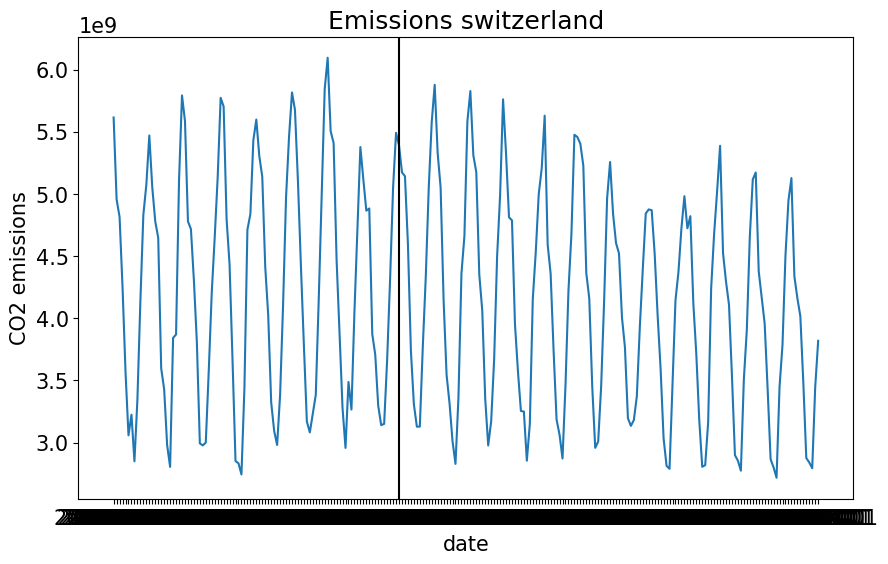

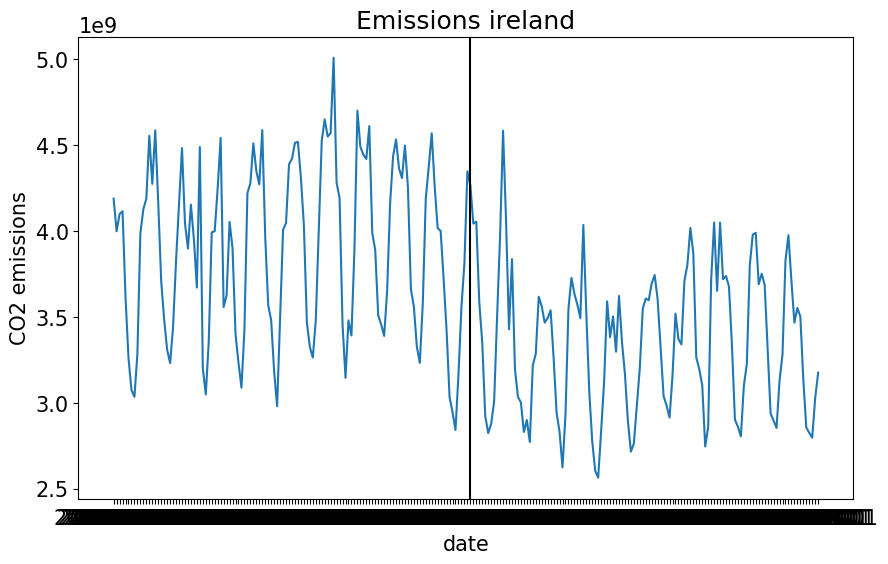

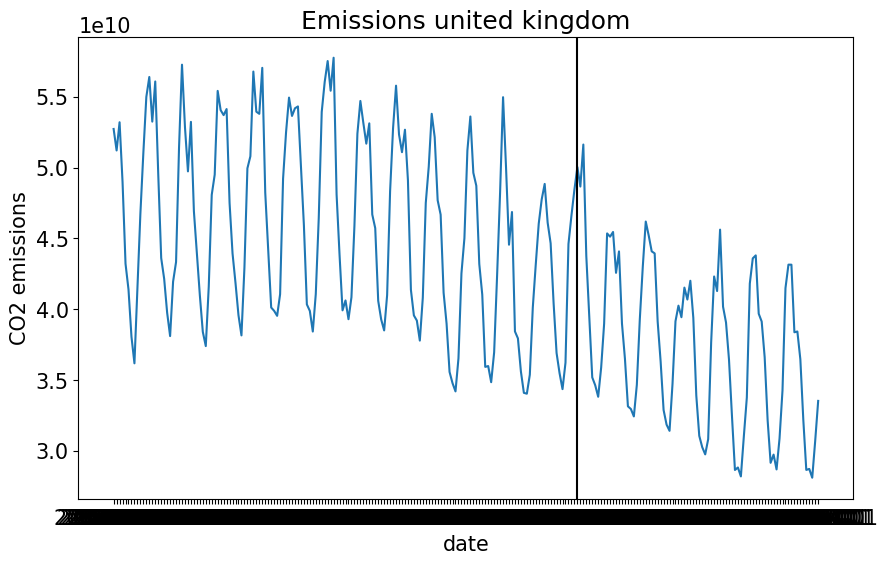

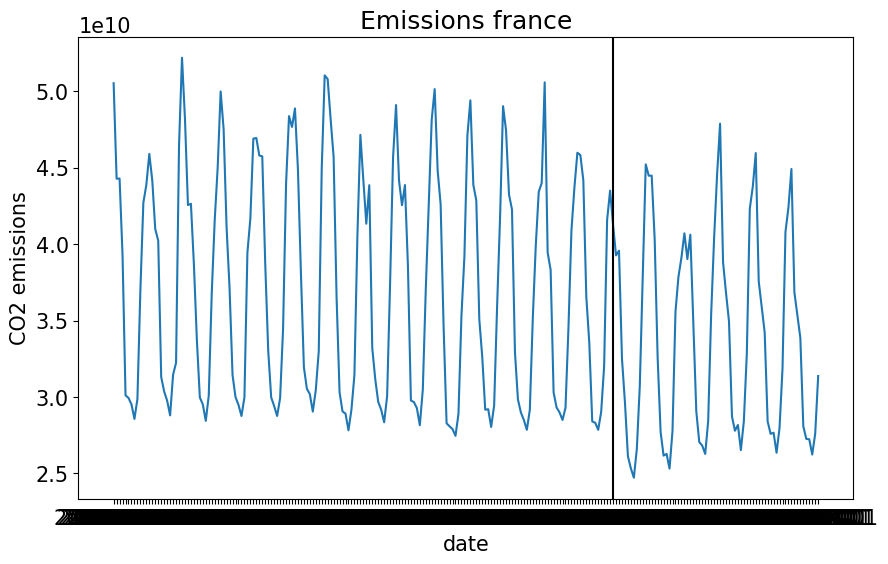

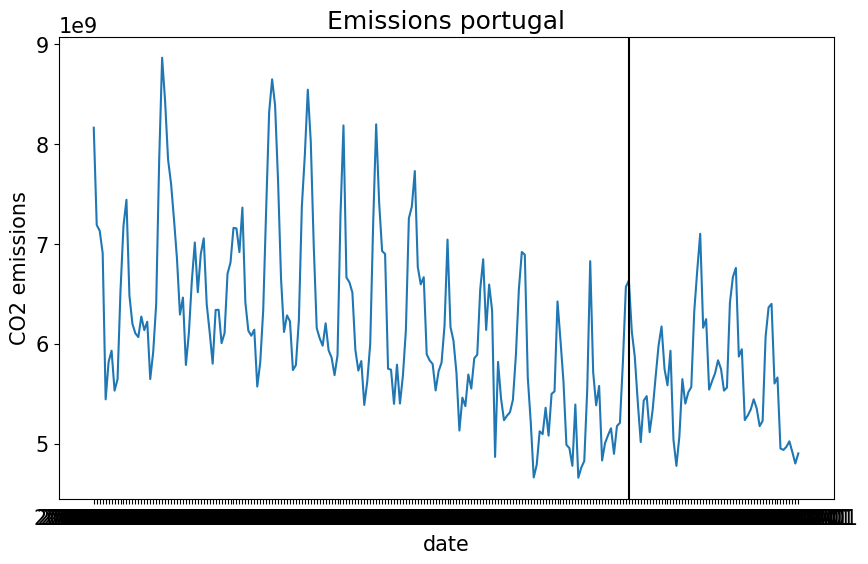

In [15]:
i = 1
for country in target_countries:
    df_country = df[df['country']==country].set_index('date')['co2']
    
    plt.figure(i, figsize=fig_size)
    plt.plot(df_country, label=country)
    plt.axvline(x=get_impl_date(country), c='black')
    plt.title(f'Emissions {country}')
    plt.xlabel('date')
    plt.ylabel('CO2 emissions')
    plt.savefig(f"{figures_path_meth_eda}co2_{country}.png")
    plt.show()
    i += 1                                                               

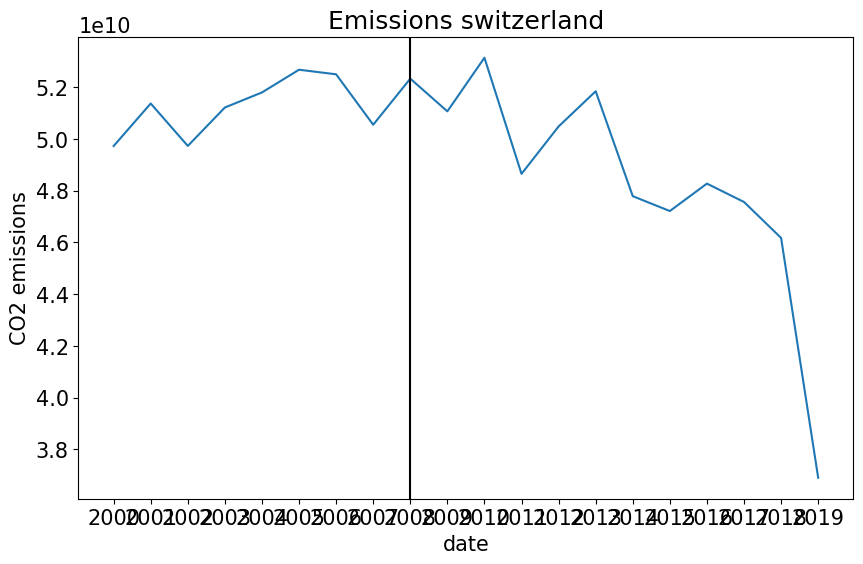

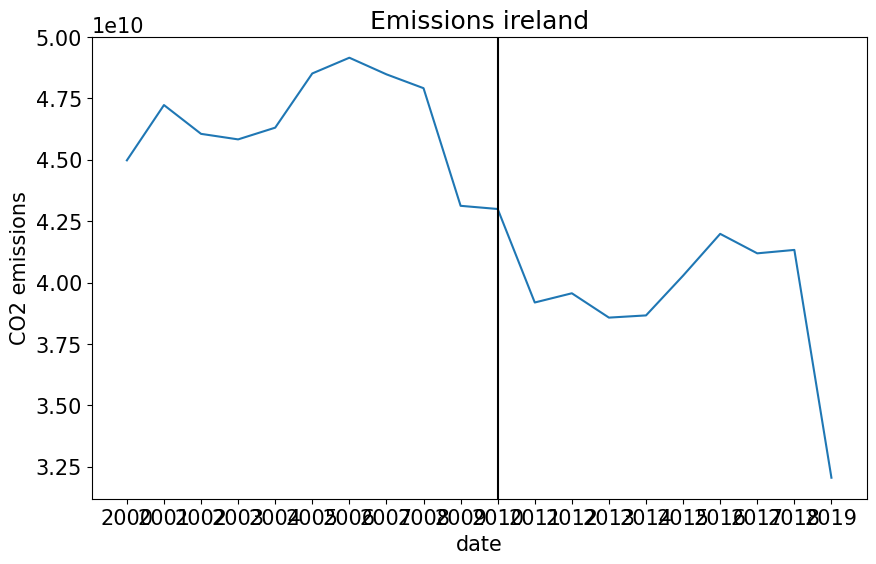

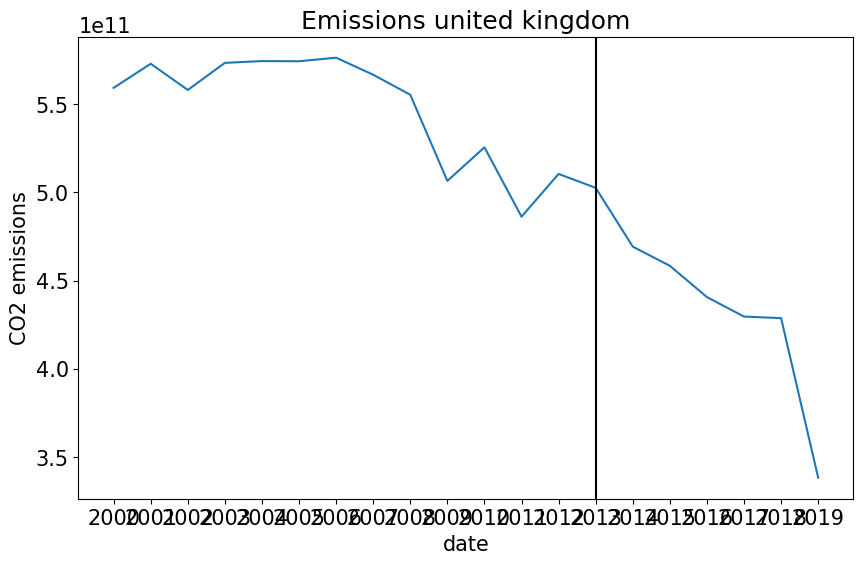

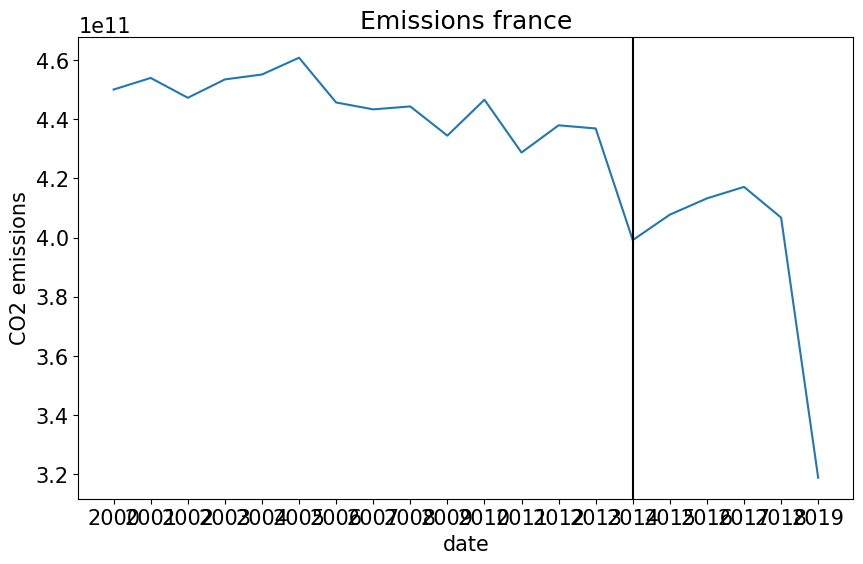

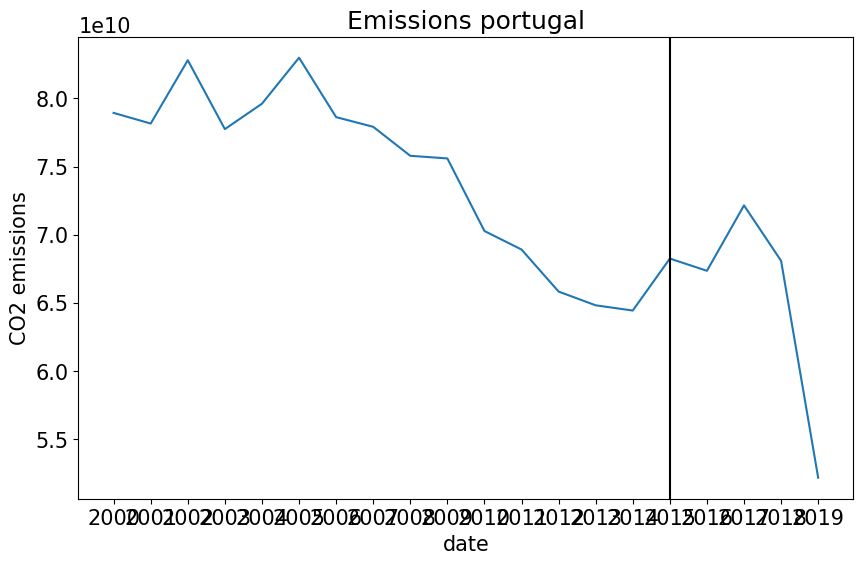

In [17]:
# grouped

i = 1
for country in target_countries:
    df['year'] = df['year'].astype(str)
    df_country = df[df['country']==country].set_index('date')[['year', 'co2']].groupby('year').sum()
    
    plt.figure(i, figsize=fig_size)
    plt.plot(df_country, label=country)
    plt.axvline(x=get_impl_date(country)[:4], c='black')
    plt.title(f'Emissions {country}')
    plt.xlabel('date')
    plt.ylabel('CO2 emissions')
    plt.savefig(f"{figures_path_meth_eda}co2_{country}_group.png")
    plt.show()
    i += 1

# Stationarity

In [18]:
df_stat = read_data(get_data_path(timeframe='m'), file_name='total_m_non_stat')
df_stat

,country,date,year,month,co2,gdp,pop,co2_cap,gdp_cap
0,austria,2002-01-01,2002,1,0.052060,0.009157,0.001714,0.069483,0.007443
1,austria,2002-02-01,2002,2,-0.025243,0.020299,0.001568,-0.066421,0.018731
2,austria,2002-03-01,2002,3,0.018000,0.031382,0.001422,-0.005582,0.029961
3,austria,2002-04-01,2002,4,0.028786,0.042408,0.001275,-0.092207,0.041132
4,austria,2002-05-01,2002,5,0.054459,0.047218,0.001162,0.028971,0.046056
...,...,...,...,...,...,...,...,...,...
4061,united kingdom,2019-06-01,2019,6,-0.017357,0.020092,-0.000658,-0.034180,0.020749
4062,united kingdom,2019-07-01,2019,7,-0.034553,0.023307,-0.000707,-0.064917,0.024013
4063,united kingdom,2019-08-01,2019,8,-0.020662,0.025343,-0.000756,-0.037323,0.026098
4064,united kingdom,2019-09-01,2019,9,-0.005156,0.027362,-0.000805,0.000994,0.028167


<AxesSubplot:xlabel='date'>

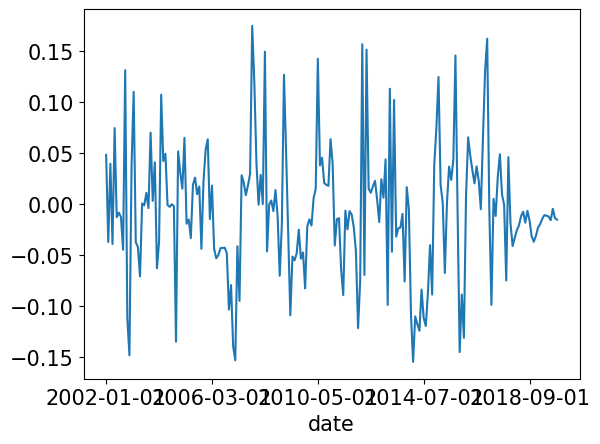

In [19]:
df_stat[df_stat['country']=='france'].set_index('date')['co2'].plot()

<AxesSubplot:xlabel='date'>

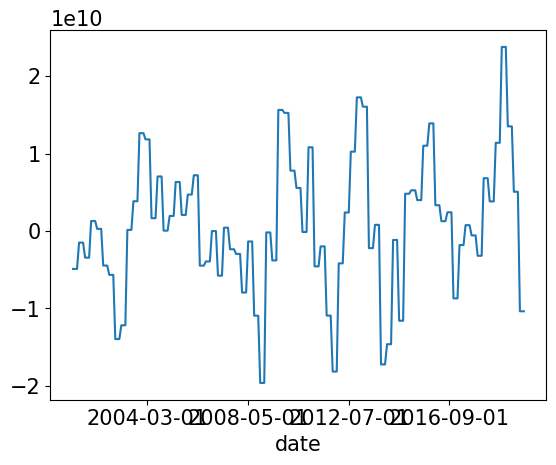

In [20]:
df[df['country']=='france'].set_index('date')['gdp'].diff(12).plot()

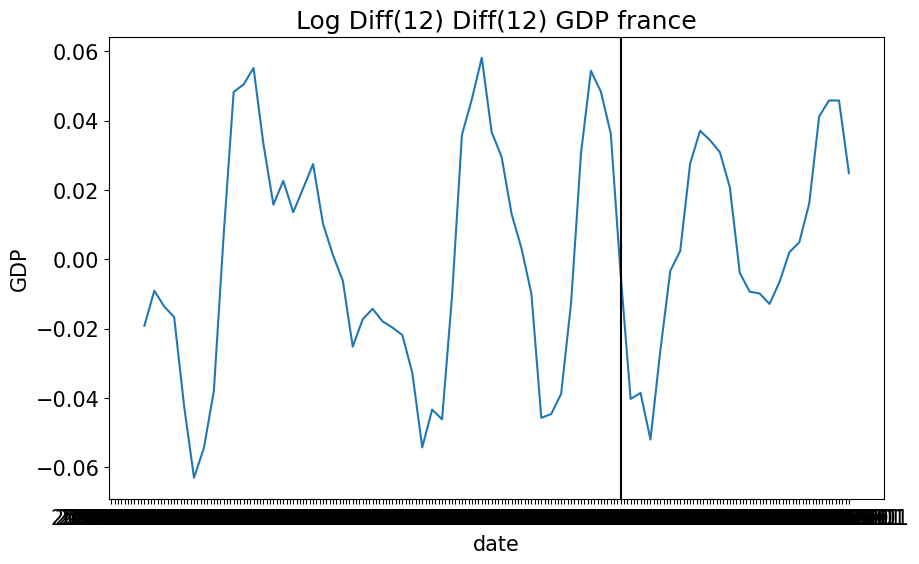

In [42]:
for country in ['france']:
    df_country = np.log(df[df['country']==country].set_index('date')['gdp']).diff(12).diff(12)
    
    plt.figure(i, figsize=fig_size)
    plt.plot(df_country, label=country)
    plt.axvline(x=get_impl_date(country), c='black')
    plt.title(f'Log Diff(12) Diff(12) GDP {country}')
    plt.xlabel('date')
    plt.ylabel('GDP')
    plt.savefig(f"{figures_path_meth_eda}gdp_{country}_log_diff12_diff12.png")
    plt.show()
    i += 1   

# Autocorrelation (ACF & PACF)

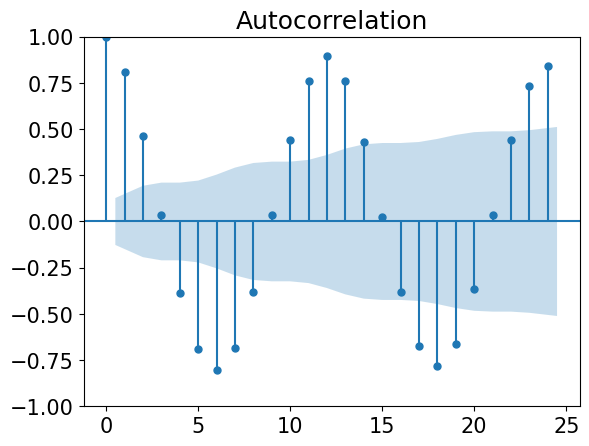

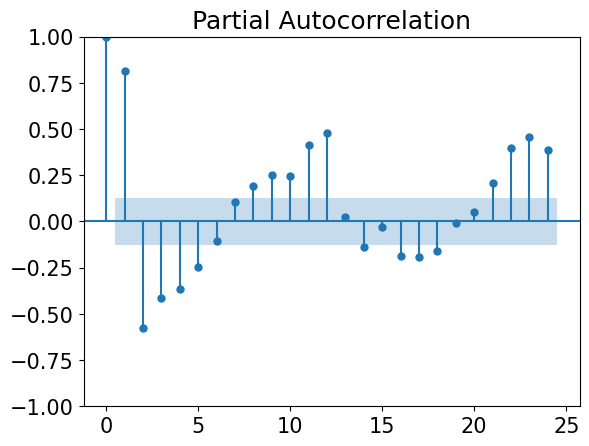

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 
series = df[df['country']=='france'].set_index('date')['co2']
plot_acf(series, lags=24);
plot_pacf(series, lags=24)
plt.show()

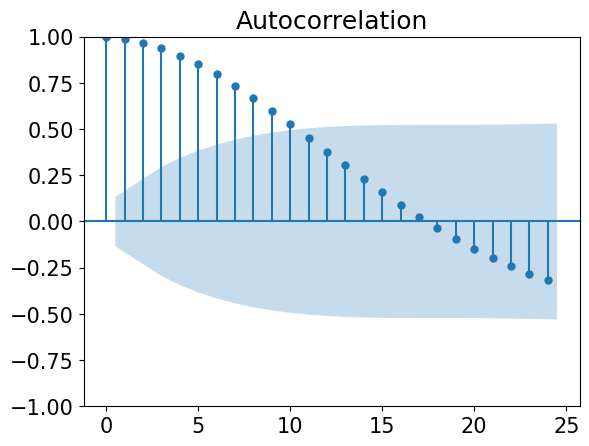

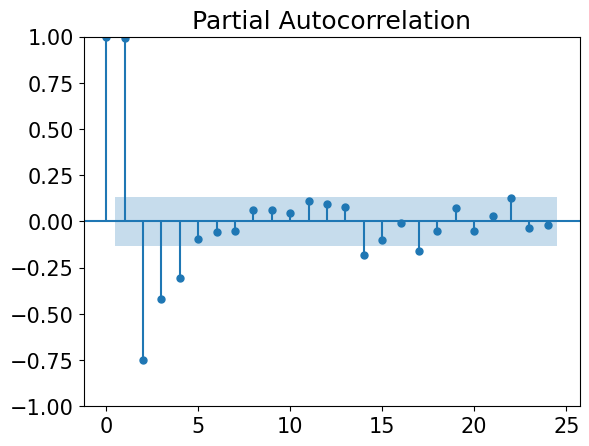

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 
series_stat = df_stat[df_stat['country']=='france'].set_index('date')['pop']
plot_acf(series_stat, lags=24);
plot_pacf(series_stat, lags=24)
plt.show()